In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

In [3]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [4]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)

In [5]:
input_shape = X_train[0].shape

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [6]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=1)]

In [7]:
batch_size = 256
n_epochs = 300

In [8]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 19s - loss: 1.8377 - acc: 0.3088 - val_loss: 1.4586 - val_acc: 0.4580
Epoch 2/300
50000/50000 [==============================] - 17s - loss: 1.3700 - acc: 0.4958 - val_loss: 1.1976 - val_acc: 0.5694
Epoch 3/300
50000/50000 [==============================] - 17s - loss: 1.1704 - acc: 0.5783 - val_loss: 1.0514 - val_acc: 0.6183
Epoch 4/300
50000/50000 [==============================] - 17s - loss: 1.0285 - acc: 0.6286 - val_loss: 0.9112 - val_acc: 0.6787
Epoch 5/300
50000/50000 [==============================] - 17s - loss: 0.9276 - acc: 0.6720 - val_loss: 0.8432 - val_acc: 0.7026
Epoch 6/300
50000/50000 [==============================] - 17s - loss: 0.8487 - acc: 0.7019 - val_loss: 0.7654 - val_acc: 0.7292
Epoch 7/300
50000/50000 [==============================] - 17s - loss: 0.7901 - acc: 0.7198 - val_loss: 0.7446 - val_acc: 0.7409
Epoch 8/300
50000/50000 [======================

In [9]:
model_bn = Sequential()

model_bn.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Flatten())
model_bn.add(Dense(512, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.5))
model_bn.add(Dense(128, activation='relu'))
model_bn.add(Dense(n_classes, activation='softmax'))

model_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [10]:
 history_bn = model_bn.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(X_val, y_val), callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 25s - loss: 1.6563 - acc: 0.4170 - val_loss: 4.1822 - val_acc: 0.1000
Epoch 2/300
50000/50000 [==============================] - 25s - loss: 1.1806 - acc: 0.5751 - val_loss: 3.1617 - val_acc: 0.2105
Epoch 3/300
50000/50000 [==============================] - 25s - loss: 0.9612 - acc: 0.6564 - val_loss: 0.9644 - val_acc: 0.6526
Epoch 4/300
50000/50000 [==============================] - 25s - loss: 0.8349 - acc: 0.7038 - val_loss: 0.8607 - val_acc: 0.6936
Epoch 5/300
50000/50000 [==============================] - 25s - loss: 0.7495 - acc: 0.7339 - val_loss: 0.7269 - val_acc: 0.7481
Epoch 6/300
50000/50000 [==============================] - 25s - loss: 0.6805 - acc: 0.7591 - val_loss: 0.6825 - val_acc: 0.7654
Epoch 7/300
50000/50000 [==============================] - 25s - loss: 0.6237 - acc: 0.7786 - val_loss: 0.7846 - val_acc: 0.7303
Epoch 8/300
50000/50000 [======================

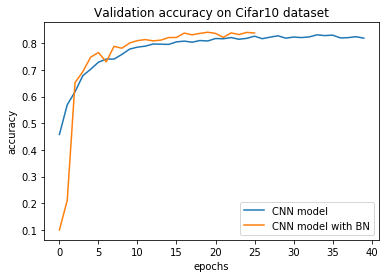

In [11]:
val_acc_bn = history_bn.history['val_acc']
val_acc = history.history['val_acc']
plt.plot(range(len(val_acc)), val_acc, label='CNN model')
plt.plot(range(len(val_acc_bn)), val_acc_bn, label='CNN model with BN')
plt.title('Validation accuracy on Cifar10 dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
print(max(val_acc_bn), max(val_acc))
print(len(val_acc_bn), len(val_acc))

0.8416 0.8319
26 40
